# **Istallazione librerie e Importazione file input**

In [ ]:

%pip install pandas openpyxl
%pip install transformers
%pip install newspaper3k
%pip install google-search-results
%pip install googletrans
%pip install llama-cpp-python
%pip install tqdm
%pip install googlesearch-python
%pip install seaborn
%pip install torch 
import pandas as pd
df_data = pd.read_excel("https://github.com/sentinel747/Applciation_AIB/raw/refs/heads/main/DataInputCRMExraction.xlsx")
df_context = pd.read_excel("https://github.com/sentinel747/Applciation_AIB/raw/refs/heads/main/ContextInputCategories.xlsx")
# Imposto le opzioni per mostrare tutte le righe e colonne
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:

df_data.head()

,Contact Name,Contact E-mail,Contact Job Title,Company / Account
0,xxxxxxx,xxxxxxxx@lagardere-tr.es,Customs Manager fashion&luxury,Lagardere
1,xxxxxxx,xxxxxxxx@ahorramas.es,Directora de Seguridad,Ahorramas
2,xxxxxxx,xxxxxxxx@asava.es,Responsable de compras y dirección de obras,ASAVA
3,xxxxxxx,xxxxxxxx@merlinprop.com,Responsable Gestión Centros Comerciales,Merlin Properties
4,xxxxxxx,xxxxxxxx@cepsa.com,Director Seguridad,Cepsa


In [7]:
df_context.head()

,#,Player,Can they buy the solution?,Can they influence the buying decision?,Is Target,Notes
0,1,Specifiers,NO,YES,YES,Specifiers indicate which is the solution to u...
1,2,Architect,NO,YES,YES,A specific kind of specifier focusing on the b...
2,3,General contractors (GC),YES,YES,YES,On a new construction (green-field) or deep re...
3,4,Brokers,NO,NO,no,These companies are in charge of finding buyer...
4,5,Tenants,YES,YES,YES,These players are in charge of selecting the t...


# **Pulizia data files**

# ***1**. Crm Data*

In [11]:
import numpy as np
import requests
import pandas as pd
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento

# Rimozione delle colonne inutili
df_data_cleaned = df_data.drop(columns=["Contact Name", "Contact Job Title"])

# Rimozione di duplicati e valori mancanti
df_data_cleaned = df_data_cleaned.drop_duplicates()
df_data_cleaned = df_data_cleaned.dropna()

# Estrazione del dominio dall'email
tqdm.pandas(desc="Estrazione domini")
df_data_cleaned['Email Domain'] = df_data_cleaned['Contact E-mail'].progress_apply(lambda email: email.split('@')[-1])

# Rimozione dei domini pubblici
public_domains = ['gmail.com', 'hotmail.com', 'yahoo.com', 'outlook.com', 'live.com', 'icloud.com', 'unknown.com']
df_data_cleaned = df_data_cleaned[~df_data_cleaned['Email Domain'].isin(public_domains)]

# Verifica dell'esistenza dei domini
def check_domain_exists(domain):
    try:
        response = requests.get(f"http://{domain}", timeout=2)
        return response.status_code == 200
    except requests.RequestException:
        return False

tqdm.pandas(desc="Verifica dei domini")
df_data_cleaned['Domain Exists'] = df_data_cleaned['Email Domain'].progress_apply(check_domain_exists)
df_data_cleaned = df_data_cleaned[df_data_cleaned['Domain Exists']]
df_data_cleaned = df_data_cleaned.drop(columns=['Domain Exists'])  # Rimuove la colonna temporanea

# Estrazione del nome principale del dominio (ad es., "savills" da "savills.es" e "savills.pt")
df_data_cleaned['Main Domain Name'] = df_data_cleaned['Email Domain'].apply(lambda domain: domain.split('.')[0])

# Rimozione dei duplicati basati sul nome principale del dominio mantenendo la prima occorrenza del dominio completo
df_data_cleaned = df_data_cleaned.drop_duplicates(subset=["Main Domain Name"])

# Rimozione della colonna temporanea "Main Domain Name"
df_data_cleaned = df_data_cleaned.drop(columns=['Main Domain Name'])

# Rimozione dei duplicati finali su "Contact E-mail" e "Email Domain"
df_data_cleaned = df_data_cleaned.drop_duplicates(subset=["Contact E-mail"])
df_data_cleaned = df_data_cleaned.drop_duplicates(subset=["Email Domain"])

# Salvataggio del risultato finale
df_data_cleaned.to_excel(r'C:\Users\Andrea\Downloads\df_data_cleaned.xlsx', index=False)

df_data_cleaned


Verifica dei domini: 100%|██████████| 166/166 [02:45<00:00,  1.00it/s]


,Contact E-mail,Company / Account,Email Domain
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es
2,xxxxxxxx@asava.es,ASAVA,asava.es
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com
7,xxxxxxxx@nhood.com,NHOOD,nhood.com
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com
9,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es
10,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com
11,xxxxxxxx@dazia.com,Dazia Capital,dazia.com
12,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com
13,xxxxxxxx@monoma.eu,Monoma,monoma.eu


# ***2**. Crm context*

In [12]:
import numpy as np

# Funzione per pulire il dataset delle categorie
def clean_categories(df):
    # Rimuovi duplicati e valori nulli
    df_cleaned = df.drop_duplicates().dropna()

    # Rimuovi le colonne specificate
    df_cleaned = df_cleaned.drop(columns=['Can they buy the solution?', 'Can they influence the buying decision?'])

    return df_cleaned

# Applica la funzione di pulizia ai dati delle categorie
df_context_cleaned = clean_categories(df_context)
df_context_cleaned.to_excel(r'C:\Users\Andrea\Downloads\df_context_cleaned.xlsx', index=False)
df_context_cleaned.head()




,#,Player,Is Target,Notes
0,1,Specifiers,YES,Specifiers indicate which is the solution to u...
1,2,Architect,YES,A specific kind of specifier focusing on the b...
2,3,General contractors (GC),YES,On a new construction (green-field) or deep re...
3,4,Brokers,no,These companies are in charge of finding buyer...
4,5,Tenants,YES,These players are in charge of selecting the t...


# **Ricerca delle infomrazioni delle aziende, deduzione e traduzione a inglese**

# ***1**. Meta informazioni*

In [13]:
import requests
from bs4 import BeautifulSoup # type: ignore
import pandas as pd
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento
from transformers import pipeline

# Inizializzazione del modello di Hugging Face per la traduzione
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-mul-en")  # Modello per tradurre in inglese

# Funzione per rimuovere duplicati da una lista di stringhe
def remove_duplicates(description_parts):
    seen = set()
    unique_parts = []
    for part in description_parts:
        if part not in seen:
            unique_parts.append(part)
            seen.add(part)
    return unique_parts

# Funzione migliorata per estrarre più informazioni dai meta tag e dai paragrafi <p>
def extract_meta_information(soup):
    info = {}

    # Estrarre meta description
    description = soup.find('meta', attrs={'name': 'description'})
    if description:
        info['meta_description'] = description.get('content', '')

    # Estrarre og:description (usato spesso per social e anteprime)
    og_description = soup.find('meta', attrs={'property': 'og:description'})
    if og_description:
        info['og_description'] = og_description.get('content', '')

    # Estrarre meta keywords (se disponibili)
    keywords = soup.find('meta', attrs={'name': 'keywords'})
    if keywords:
        info['meta_keywords'] = keywords.get('content', '')

    # Estrarre og:title (utilizzato per anteprime sui social)
    og_title = soup.find('meta', attrs={'property': 'og:title'})
    if og_title:
        info['og_title'] = og_title.get('content', '')

    # Estrazione di più paragrafi per raccogliere maggiori informazioni
    paragraphs = soup.find_all('p')
    if paragraphs:
        # Limitiamo l'estrazione a un massimo di 7 paragrafi, per evitare di estrarre troppo testo
        paragraph_text = " ".join([p.get_text().strip() for p in paragraphs[:7] if p.get_text().strip()])
        info['paragraphs'] = paragraph_text

    return info

# Funzione per estrarre informazioni dal sito web
def extract_company_info(url):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Usa la funzione migliorata per estrarre le informazioni
            meta_info = extract_meta_information(soup)

            # Combina le informazioni raccolte per creare una descrizione
            description_parts = []

            # Aggiungi le varie descrizioni disponibili
            if 'meta_description' in meta_info:
                description_parts.append(meta_info['meta_description'])
            if 'og_description' in meta_info:
                description_parts.append(meta_info['og_description'])
            if 'paragraphs' in meta_info:
                description_parts.append(meta_info['paragraphs'])

            # Rimuovi duplicati dalle descrizioni
            unique_description_parts = remove_duplicates(description_parts)

            # Unisci le parti di descrizione
            full_description = " ".join(unique_description_parts)
            return full_description[:500]  # Limita a 500 caratteri
        else:
            return "Company information not available."
    except Exception as e:
        return "Company information not available."

# Funzione per tradurre la descrizione in inglese
def translate_to_english(text):
    try:
        translation = translator(text, max_length=500)
        return translation[0]['translation_text']
    except Exception as e:
        return text

# Funzione per creare il link del sito web a partire dal dominio email
def construct_website_url(domain):
    return f"http://{domain}"

# Funzione per aggiungere la colonna "Description" nel DataFrame con barra di progresso
def add_description_column(df):
    descriptions = []
    
    # Usa tqdm per visualizzare la barra di avanzamento
    for domain in tqdm(df['Email Domain'], desc="Estrazione informazioni", unit="azienda"):
        website_url = construct_website_url(domain)
        web_description = extract_company_info(website_url)
        translated_description = translate_to_english(web_description)
        descriptions.append(translated_description)

    df['Description'] = descriptions  # Aggiungi tutte le descrizioni al DataFrame
    return df

# Esegui la funzione per aggiungere la colonna 'Description' al DataFrame esistente
df_data_with_description = add_description_column(df_data_cleaned)
df_data_with_description.to_excel(r'C:\Users\Andrea\Downloads\df_data_with_company_description.xlsx', index=False)

df_data_with_description.head()


c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is availabl

,Contact E-mail,Company / Account,Email Domain,Description
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...


# ***2**. Deduzione ed unione*

# Tramite modello Llama3.2 1B (3B non permette dowload)

In [14]:
import pandas as pd
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento
from llama_cpp import Llama

# Inizializzazione del modello LLama 3.2 Instruct 1B Bartowski con il percorso corretto e seed fisso
llm = Llama(model_path="C:/Users/Andrea/.cache/lm-studio/models/bartowski/Llama-3.2-1B-Instruct-GGUF/Llama-3.2-1B-Instruct-Q4_0.gguf")

# Funzione per dedurre l'attività aziendale basata sul dominio con il modello LLama
def deduce_company_activity(domain, description):
    try:
        # Definisci il contesto o il prompt di base per il modello
        base_prompt = "You are an expert business analyst. Your role is to analyze the information provided and predict the business activity of a company based on its domain and description. Answer with a short sentence regarding the company activity and do not use bullet points, just a straight forward answer "
        
        # Aggiungi il dominio e la descrizione specifica nel prompt
        prompt = f"{base_prompt}\n\nDomain: {domain}\nDescription: {description}\n\nWhat does the company is likely to do?"

        # Usa il modello LLama per dedurre l'attività aziendale con un seed fisso e temperatura 0
        result = llm(prompt, max_tokens=200, temperature=0, seed=42)  # Impostiamo seed e temperature
        return result['choices'][0]['text'].strip()
    except Exception as e:
        return "Could not infer company activity from domain."

# Funzione per aggiungere la deduzione AI alla colonna "Description" con barra di progresso
def add_deduction_column(df):
    descriptions_with_deduction = []

    # Usa tqdm per visualizzare la barra di avanzamento
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="AI Deduction Progress", unit="row"):
        domain = row['Email Domain']
        description = row['Description']
        inferred_activity = deduce_company_activity(domain, description)
        full_description = f"{description}\n\nAI Deduction: {inferred_activity}"
        descriptions_with_deduction.append(full_description)

    df['Description'] = descriptions_with_deduction  # Aggiungi tutte le descrizioni aggiornate al DataFrame
    return df

# Aggiungi la deduzione alla colonna 'Description'
df_data_with_deduction_description = add_deduction_column(df_data_with_description)

# Salva il DataFrame aggiornato con le deduzioni in un nuovo file Excel
df_data_with_deduction_description.to_excel(r'C:\Users\Andrea\Downloads\df_data_with_company_description_and_deduction.xlsx', index=False)

# Mostra il risultato
df_data_with_deduction_description.head()


llama_model_loader: loaded meta data with 35 key-value pairs and 147 tensors from C:/Users/Andrea/.cache/lm-studio/models/bartowski/Llama-3.2-1B-Instruct-GGUF/Llama-3.2-1B-Instruct-Q4_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 1B Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.basename str              = Llama-3.2
llama_model_loader: - kv   5:                         general.size_label str              = 1B
llama_model_loader: - kv   6:                            general.license str

,Contact E-mail,Company / Account,Email Domain,Description
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...


# **Classificazione**

# Data reload just for saving time 

In [3]:
df_data_with_deduction_description_test=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\df_data_with_company_description_and_deduction.xlsx")
df_context_cleaned_test=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\df_context_cleaned.xlsx")

# Classificazione con similarità coseno 

Classificazione: 100%|██████████| 87/87 [00:00<00:00, 1599.48azienda/s]


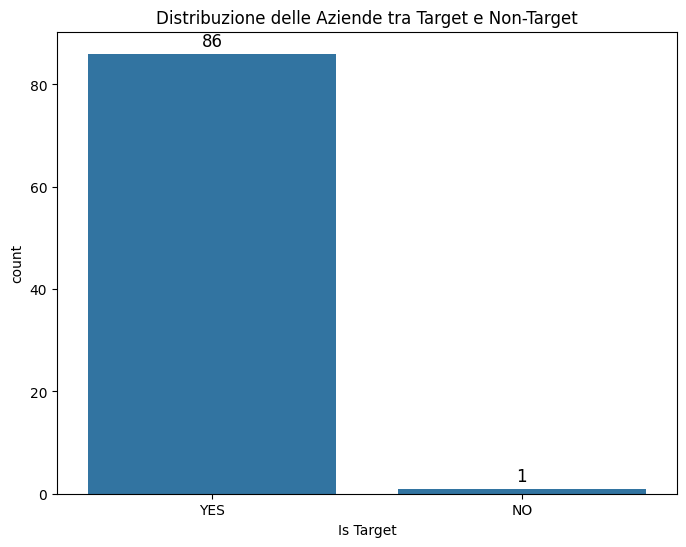

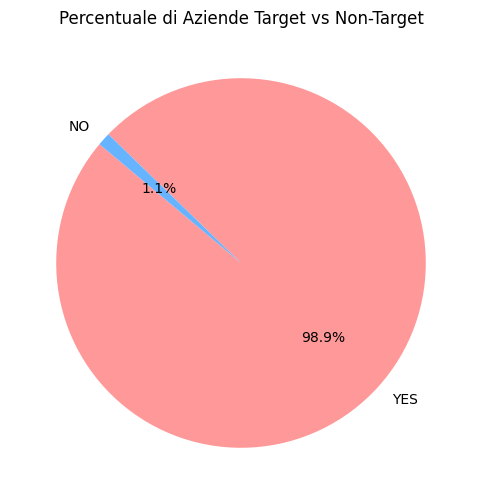

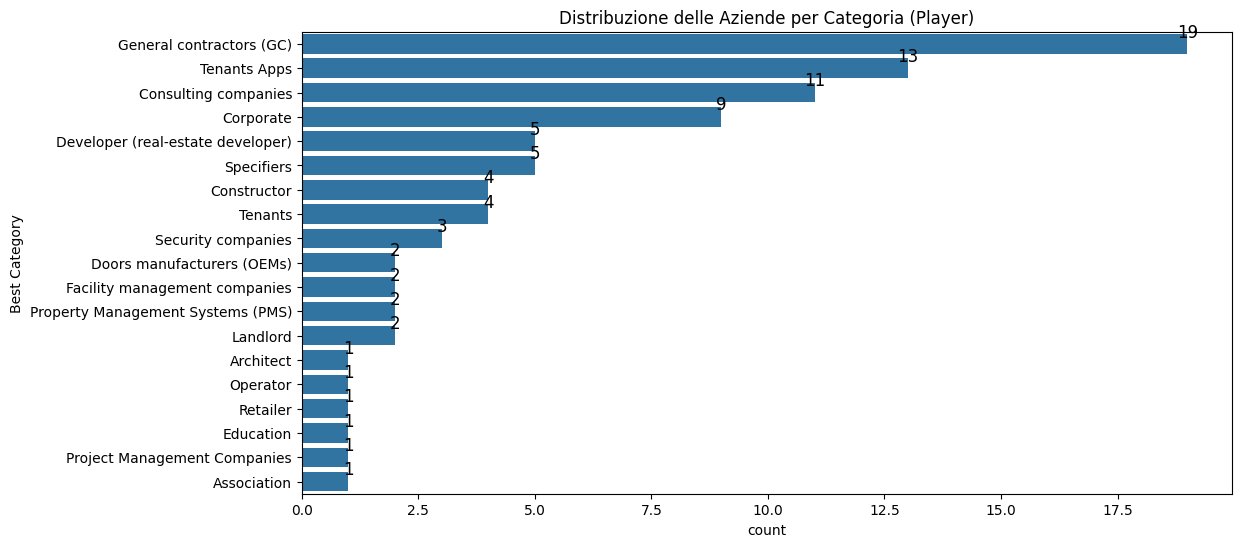

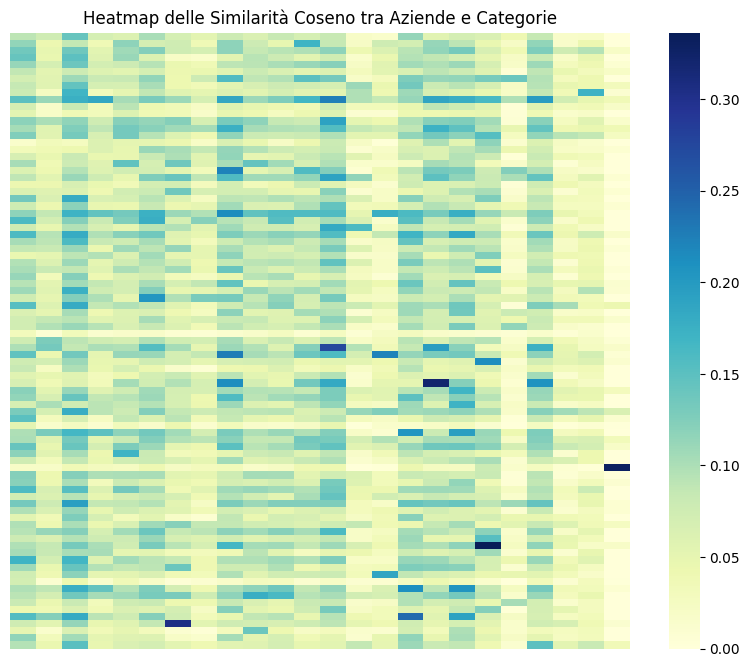

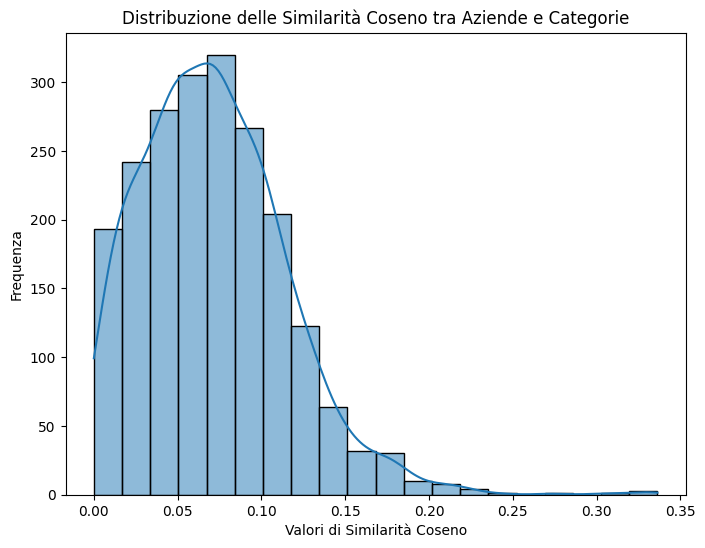

,Contact E-mail,Company / Account,Email Domain,Description,Best Category,Is Target
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...,General contractors (GC),YES
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...,Property Management Systems (PMS),YES
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...,General contractors (GC),YES
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...,General contractors (GC),YES
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...,General contractors (GC),YES
9,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es,"Funds for exclusive mobile phones, buy now and...",Landlord,YES
10,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com,Group Lar we are an international company with...,Consulting companies,YES
11,xxxxxxxx@dazia.com,Dazia Capital,dazia.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,General contractors (GC),YES
12,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Retailer,YES
13,xxxxxxxx@monoma.eu,Monoma,monoma.eu,Together we value your empty money We work clo...,Tenants Apps,YES


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Funzione per eseguire la classificazione basata su TF-IDF e similarità coseno
def classify_with_cosine_similarity(df_data, df_context):
    # Combina le descrizioni e le note per costruire il vocabolario
    all_texts = df_data['Description'].tolist() + df_context['Notes'].tolist()

    # Creazione della rappresentazione TF-IDF per le descrizioni e le note
    vectorizer = TfidfVectorizer().fit(all_texts)
    company_vectors = vectorizer.transform(df_data['Description'])
    category_vectors = vectorizer.transform(df_context['Notes'])

    best_matches = []
    similarities_matrix = []

    # Calcola la similarità coseno tra ogni descrizione aziendale e le note delle categorie
    for i in tqdm(range(company_vectors.shape[0]), desc="Classificazione", unit="azienda"):
        similarities = cosine_similarity(company_vectors[i], category_vectors)
        similarities_matrix.append(similarities.flatten())  # Appiattisci la matrice delle similarità
        best_match_idx = similarities.argmax()  # Trova l'indice con la similarità massima
        best_category = df_context.iloc[best_match_idx]['Player']  # Ottieni la categoria corrispondente
        best_matches.append(best_category)

    # Assegna la migliore categoria trovata al DataFrame
    df_data['Best Category'] = best_matches
    return df_data, pd.DataFrame(similarities_matrix)

# Funzione per aggiungere la colonna "Best Category" e "Is Target" nel DataFrame
def add_classification_and_target_column(df_data, df_context):
    # Applica la classificazione basata su similarità coseno e ottieni la matrice di similarità
    df_data, similarities_matrix = classify_with_cosine_similarity(df_data, df_context)

    # Creazione della mappa per "Is Target"
    target_map = df_context.set_index('Player')['Is Target'].to_dict()

    # Funzione per verificare se la categoria è un target
    def is_target_category(category):
        return target_map.get(category, "No")  # Restituisce "No" se la categoria non è trovata

    # Aggiunge la colonna "Is Target" in base alla categoria assegnata
    df_data['Is Target'] = df_data['Best Category'].apply(lambda category: is_target_category(category))

    return df_data, similarities_matrix

# Funzione per visualizzare la distribuzione delle categorie (Target vs Non-Target)
def plot_target_distribution(df_data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Is Target', data=df_data)
    
    # Aggiungi le etichette sopra ogni barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Distribuzione delle Aziende tra Target e Non-Target')
    plt.show()

# Funzione per visualizzare la distribuzione delle categorie (Player)
def plot_player_distribution(df_data):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y='Best Category', data=df_data, order=df_data['Best Category'].value_counts().index)
    
    # Aggiungi le etichette per il numero di aziende per ciascuna categoria
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Distribuzione delle Aziende per Categoria (Player)')
    plt.show()

# Funzione per visualizzare la heatmap delle similarità coseno
def plot_similarity_heatmap(similarities_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarities_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)
    plt.title("Heatmap delle Similarità Coseno tra Aziende e Categorie")
    plt.show()

# Funzione per visualizzare un istogramma della distribuzione delle similarità
def plot_similarity_histogram(similarities_matrix):
    plt.figure(figsize=(8, 6))
    sns.histplot(similarities_matrix.to_numpy().flatten(), bins=20, kde=True)  # Conversione in NumPy array
    plt.title("Distribuzione delle Similarità Coseno tra Aziende e Categorie")
    plt.xlabel("Valori di Similarità Coseno")
    plt.ylabel("Frequenza")
    plt.show()

# Funzione per visualizzare la percentuale di target
def plot_target_percentage(df_data):
    target_counts = df_data['Is Target'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    plt.title("Percentuale di Aziende Target vs Non-Target")
    plt.show()

# Applica la classificazione e la verifica del target utilizzando la similarità coseno
df_data_classified_cosinesimilarity, similarities_matrix_cosinesimilarity = add_classification_and_target_column(df_data_with_deduction_description, df_context_cleaned)

# Salva il DataFrame aggiornato con le categorie classificate e la colonna Is Target
output_path_llm = r'C:\Users\Andrea\Downloads\data_classified_cosinesimilarity.xlsx'
df_data_classified_cosinesimilarity.to_excel(output_path_llm, index=False)

# Visualizza i grafici
plot_target_distribution(df_data_classified_cosinesimilarity)
plot_target_percentage(df_data_classified_cosinesimilarity)  # Aggiunta del grafico per la percentuale di Target
plot_player_distribution(df_data_classified_cosinesimilarity)
plot_similarity_heatmap(similarities_matrix_cosinesimilarity)
plot_similarity_histogram(similarities_matrix_cosinesimilarity)

df_data_classified_cosinesimilarity


# Classificazione con DistilBert (Versione leggera e open source di BartLarge)

c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Classificazione DistilBERT:  49%|████▉     | 43/87 [01:51<01:10,  1.60s/azienda]

Error during classification: The size of tensor a (780) must match the size of tensor b (512) at non-singleton dimension 1


Classificazione DistilBERT: 100%|██████████| 87/87 [03:52<00:00,  2.67s/azienda]


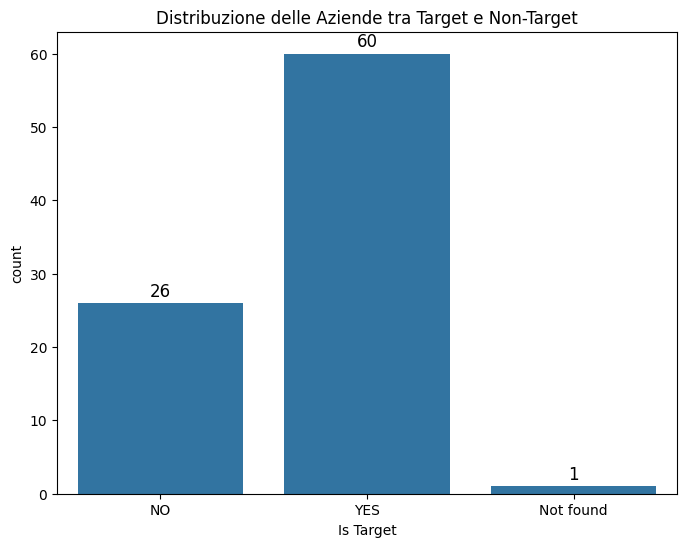

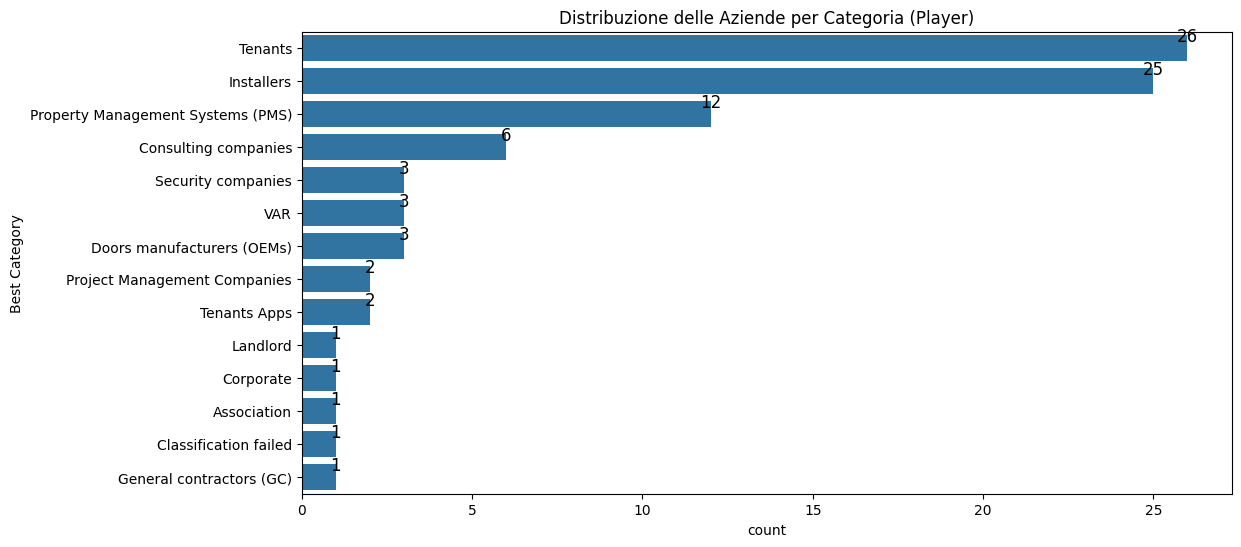

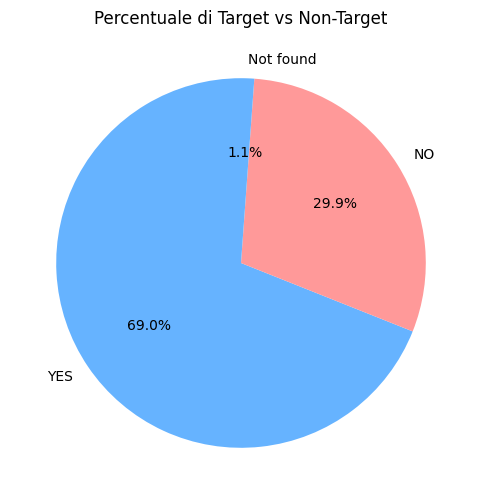

,Contact E-mail,Company / Account,Email Domain,Description,Best Category,Is Target
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...,Installers,NO
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...,Tenants,YES
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...,Tenants,YES
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...,Property Management Systems (PMS),YES
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...,Installers,NO
9,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es,"Funds for exclusive mobile phones, buy now and...",Property Management Systems (PMS),YES
10,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com,Group Lar we are an international company with...,Project Management Companies,YES
11,xxxxxxxx@dazia.com,Dazia Capital,dazia.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Property Management Systems (PMS),YES
12,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Installers,NO
13,xxxxxxxx@monoma.eu,Monoma,monoma.eu,Together we value your empty money We work clo...,Tenants,YES


In [16]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento

# Inizializzazione del modello DistilBERT per la classificazione zero-shot
tokenizer_bert = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model_bert = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Funzione per classificare la descrizione aziendale utilizzando DistilBERT
def classify_with_bert(description, players, notes):
    try:
        scores = []

        # Per ogni nota (hypothesis), confrontala con la descrizione (premise)
        for note in notes:
            inputs = tokenizer_bert.encode_plus(description, note, return_tensors="pt", truncation=True, max_length=1500)

            # Esegui la classificazione con DistilBERT
            output = model_bert(**inputs)
            logits = output.logits.detach().numpy()
            scores.append(logits[0][1])  # Prendi il punteggio positivo

        # Trova la nota con il punteggio più alto
        best_score_idx = torch.argmax(torch.tensor(scores)).item()
        return players[best_score_idx] if best_score_idx < len(players) else "Classification failed"
    except Exception as e:
        print(f"Error during classification: {e}")
        return "Classification failed"

# Funzione per aggiungere la colonna "Best Category" e "Is Target" nel DataFrame
def add_classification_and_target_column(df_data, df_context):
    players = df_context['Player'].tolist()
    notes = df_context['Notes'].tolist()
    target_map = df_context.set_index('Player')['Is Target'].to_dict()

    def is_target_category(category):
        return target_map.get(category, "Not found") #se non trovata

    classifications = []
    is_target_list = []

    for _, row in tqdm(df_data.iterrows(), total=df_data.shape[0], desc="Classificazione DistilBERT", unit="azienda"):
        description = row['Description']
        best_category = classify_with_bert(description, players, notes)
        classifications.append(best_category)
        is_target_list.append(is_target_category(best_category))

    df_data['Best Category'] = classifications
    df_data['Is Target'] = is_target_list
    return df_data

# Funzioni per visualizzare i grafici
def plot_target_distribution(df_data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Is Target', data=df_data)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende tra Target e Non-Target')
    plt.show()

def plot_player_distribution(df_data):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y='Best Category', data=df_data, order=df_data['Best Category'].value_counts().index)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende per Categoria (Player)')
    plt.show()

def plot_target_percentage(df_data):
    target_percentage = df_data['Is Target'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    target_percentage.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
    plt.title('Percentuale di Target vs Non-Target')
    plt.ylabel('')
    plt.show()

# Esegui la classificazione e aggiungi la colonna "Best Category"
df_data_classified_Bertsmall = add_classification_and_target_column(df_data_with_deduction_description, df_context_cleaned)

# Salva il risultato in un file Excel
output_path_bert = r'C:/Users/Andrea/Downloads/df_data_classified_with_distilbert_categories_and_target.xlsx'
df_data_classified_Bertsmall.to_excel(output_path_bert, index=False)

# Visualizza i grafici
plot_target_distribution(df_data_classified_Bertsmall)
plot_player_distribution(df_data_classified_Bertsmall)
plot_target_percentage(df_data_classified_Bertsmall)

# Mostra il risultato
df_data_classified_Bertsmall


# Classificaizone con Bart Large

c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Classificazione BART: 100%|██████████| 87/87 [1:51:03<00:00, 76.59s/azienda]   


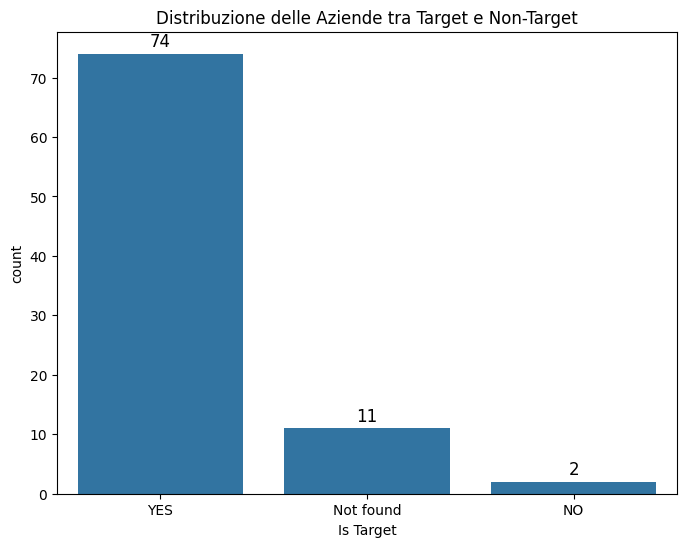

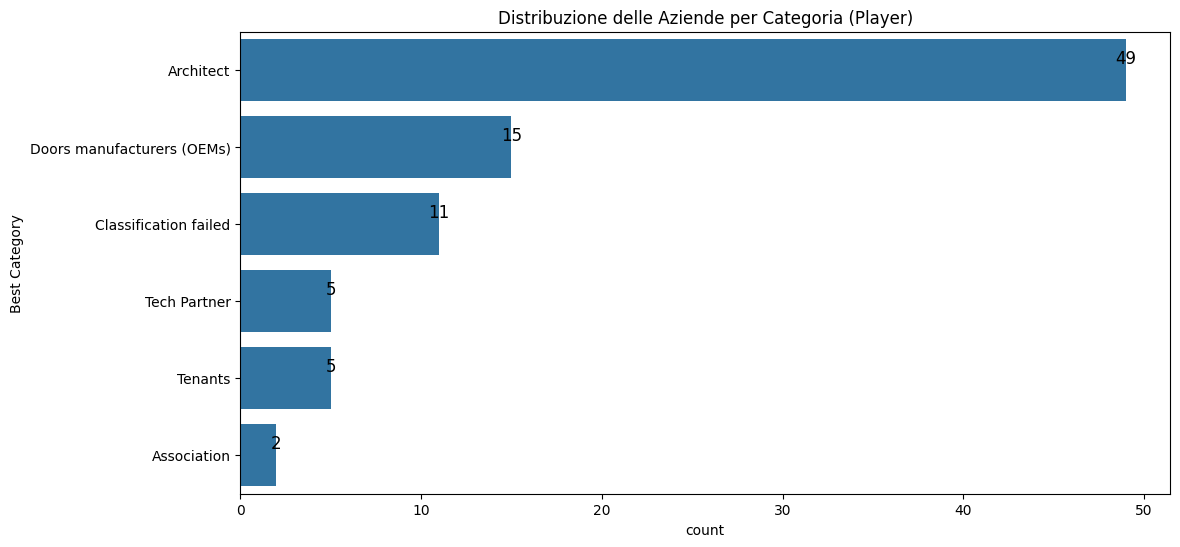

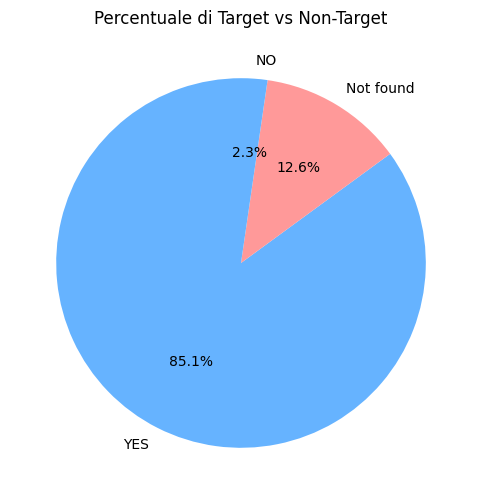

,Contact E-mail,Company / Account,Email Domain,Description,Best Category,Is Target
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...,Doors manufacturers (OEMs),YES
1,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...,Architect,YES
2,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...,Architect,YES
3,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...,Architect,YES
4,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...,Architect,YES
5,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es,"Funds for exclusive mobile phones, buy now and...",Doors manufacturers (OEMs),YES
6,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com,Group Lar we are an international company with...,Architect,YES
7,xxxxxxxx@dazia.com,Dazia Capital,dazia.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Doors manufacturers (OEMs),YES
8,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Architect,YES
9,xxxxxxxx@monoma.eu,Monoma,monoma.eu,Together we value your empty money We work clo...,Architect,YES


In [4]:
from transformers import BartTokenizer, BartForSequenceClassification
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento

# Inizializzazione del modello BART per la classificazione zero-shot
tokenizer_bart = BartTokenizer.from_pretrained("facebook/bart-large-mnli")
model_bart = BartForSequenceClassification.from_pretrained("facebook/bart-large-mnli")

# Funzione per classificare la descrizione aziendale utilizzando BART senza prompt generativo
def classify_with_bart(description, players, notes):
    try:
        logits = []

        # Per ogni nota (hypothesis), confrontala con la descrizione (premise)
        for note in notes:
            # Combina premise (descrizione) e hypothesis (nota) come input per il modello
            inputs_combined = tokenizer_bart(f"premise: {description} hypothesis: {note}", return_tensors="pt", truncation=True, max_length=1500)

            # Esegui la classificazione con BART
            output = model_bart(**inputs_combined)

            # Prendi i logits (punteggi) per la classificazione
            logits.append(output.logits)

        # Controlla che abbiamo almeno un logit valido
        if not logits:
            return "Classification failed"

        # Converti i logits in tensori e scegli l'indice con il valore massimo
        logits_tensor = torch.stack(logits)  # Creiamo un tensore che include tutti i logits
        predicted_class_id = logits_tensor.argmax().item()  # Seleziona l'indice della previsione migliore

        # Controlla che l'indice sia valido rispetto alle categorie disponibili
        if predicted_class_id >= len(players):
            return "Classification failed"

        return players[predicted_class_id]
    except Exception as e:
        print(f"Error during classification: {e}")
        return "Classification failed"

# Funzione per aggiungere la colonna "Best Category" e "Is Target" nel DataFrame
def add_classification_and_target_column(df_data, df_context):
    players = df_context['Player'].tolist()
    notes = df_context['Notes'].tolist()
    target_map = df_context.set_index('Player')['Is Target'].to_dict()  # Mappa di categoria -> Target (Sì/No)

    # Funzione per verificare se la categoria è un target
    def is_target_category(category):
        return target_map.get(category, "Not found")  # Restituisce "No" se la categoria non è trovata

    classifications = []
    is_target_list = []

    # Usa tqdm per visualizzare la barra di avanzamento
    for _, row in tqdm(df_data.iterrows(), total=df_data.shape[0], desc="Classificazione BART", unit="azienda"):
        description = row['Description']
        best_category = classify_with_bart(description, players, notes)
        classifications.append(best_category)
        is_target_list.append(is_target_category(best_category))

    df_data['Best Category'] = classifications
    df_data['Is Target'] = is_target_list

    return df_data

# Funzione per visualizzare la distribuzione delle categorie (Target vs Non-Target)
def plot_target_distribution(df_data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Is Target', data=df_data)
    
    # Aggiungi le etichette sopra ogni barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Distribuzione delle Aziende tra Target e Non-Target')
    plt.show()

# Funzione per visualizzare la distribuzione delle categorie (Player)
def plot_player_distribution(df_data):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y='Best Category', data=df_data, order=df_data['Best Category'].value_counts().index)
    
    # Aggiungi le etichette per il numero di aziende per ciascuna categoria
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Distribuzione delle Aziende per Categoria (Player)')
    plt.show()

# Funzione per visualizzare la percentuale delle categorie target/non-target
def plot_target_percentage(df_data):
    target_percentage = df_data['Is Target'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    target_percentage.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
    plt.title('Percentuale di Target vs Non-Target')
    plt.ylabel('')  # Rimuovi l'etichetta asse y per il grafico a torta
    plt.show()

# Esegui la classificazione e aggiungi la colonna "Best Category"
df_data_classified_bartLarge = add_classification_and_target_column(df_data_with_deduction_description_test, df_context_cleaned_test)

# Salva il risultato in un file Excel
output_path_bart = r'C:/Users/Andrea/Downloads/df_data_classified_with_bart_categories_and_target.xlsx'
df_data_classified_bartLarge.to_excel(output_path_bart, index=False)

# Visualizza i grafici
plot_target_distribution(df_data_classified_bartLarge)
plot_player_distribution(df_data_classified_bartLarge)
plot_target_percentage(df_data_classified_bartLarge)

# Mostra il risultato
df_data_classified_bartLarge


# Classificaizone con FlanT5 Small

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Classificazione Flan-T5:   0%|          | 0/87 [00:00<?, ?azienda/s]c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\generation\configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Classificazione Flan-T5: 100%|██████████| 87/87 [06:27<00:00,  4.45s/azienda]


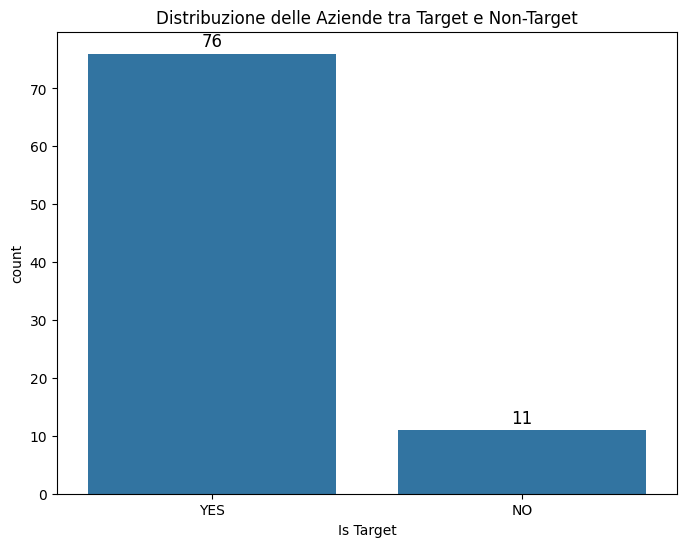

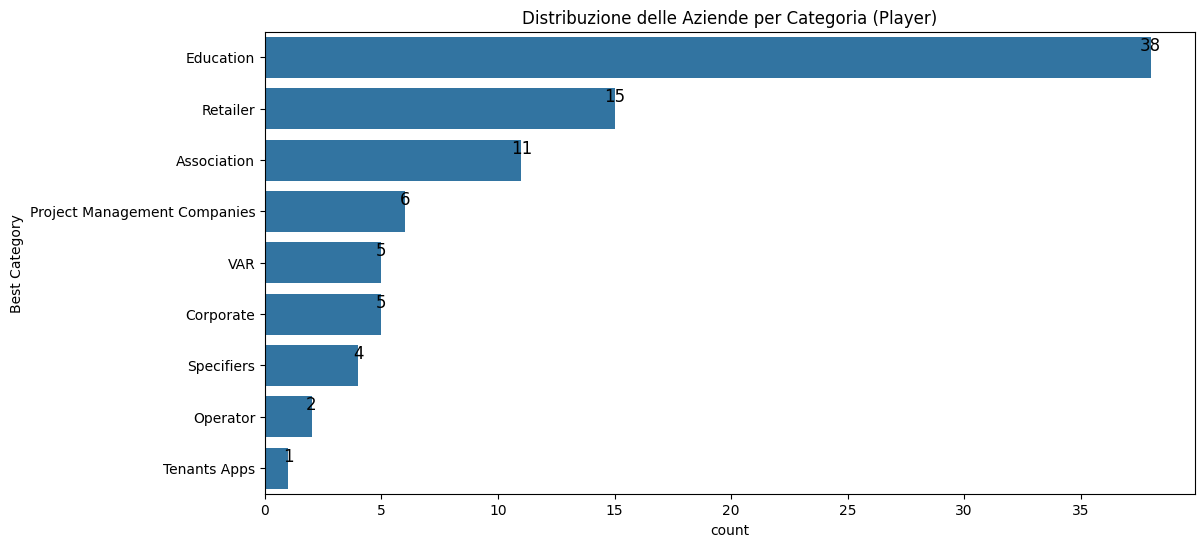

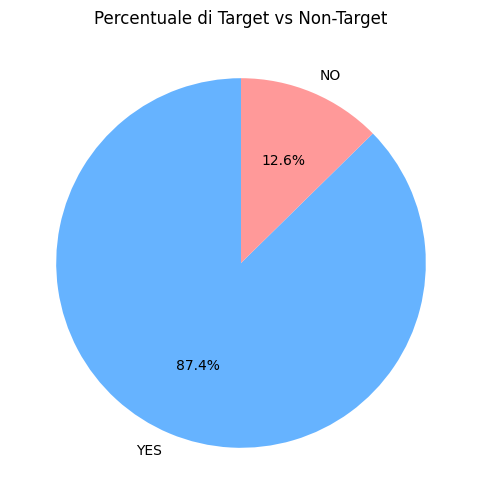

,Contact E-mail,Company / Account,Email Domain,Description,Best Category,Is Target
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...,Retailer,YES
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...,Specifiers,YES
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...,Education,YES
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...,Specifiers,YES
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...,Association,NO
9,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es,"Funds for exclusive mobile phones, buy now and...",VAR,YES
10,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com,Group Lar we are an international company with...,Association,NO
11,xxxxxxxx@dazia.com,Dazia Capital,dazia.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Education,YES
12,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Education,YES
13,xxxxxxxx@monoma.eu,Monoma,monoma.eu,Together we value your empty money We work clo...,Education,YES


In [18]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento

# Inizializzazione del modello Flan-T5 per la classificazione
tokenizer_t5 = T5Tokenizer.from_pretrained("google/flan-t5-small")  # Usa flan-t5-small, versione leggera
model_t5 = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

# Funzione per classificare la descrizione aziendale utilizzando Flan-T5
def classify_with_t5(description, players, notes):
    try:
        scores = []

        for note in notes:
            input_text = f"Classify: {description} as {note}"
            inputs = tokenizer_t5(input_text, return_tensors="pt", truncation=True, max_length=1500)
            outputs = model_t5.generate(**inputs, max_length=20, temperature=0.0)

            # Decodifica il testo generato e calcola un punteggio di somiglianza con la `note`
            generated_text = tokenizer_t5.decode(outputs[0], skip_special_tokens=True).lower()
            score = sum(1 for word in note.lower().split() if word in generated_text) / len(note.split())
            scores.append(score)

        best_score_idx = torch.argmax(torch.tensor(scores)).item()
        return players[best_score_idx] if best_score_idx < len(players) else "Classification failed"
    except Exception as e:
        print(f"Error during classification: {e}")
        return "Classification failed"

# Funzione per aggiungere la colonna "Best Category" e "Is Target" nel DataFrame
def add_classification_and_target_column(df_data, df_context):
    players = df_context['Player'].tolist()
    notes = df_context['Notes'].tolist()
    target_map = df_context.set_index('Player')['Is Target'].to_dict()

    def is_target_category(category):
        return target_map.get(category, "Not found")  # Restituisce "Not found" se la categoria non è trovata

    classifications = []
    is_target_list = []

    for _, row in tqdm(df_data.iterrows(), total=df_data.shape[0], desc="Classificazione Flan-T5", unit="azienda"):
        description = row['Description']
        best_category = classify_with_t5(description, players, notes)
        classifications.append(best_category)
        is_target_list.append(is_target_category(best_category))

    df_data['Best Category'] = classifications
    df_data['Is Target'] = is_target_list
    return df_data

# Funzioni per visualizzare i grafici
def plot_target_distribution(df_data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Is Target', data=df_data)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende tra Target e Non-Target')
    plt.show()

def plot_player_distribution(df_data):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y='Best Category', data=df_data, order=df_data['Best Category'].value_counts().index)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende per Categoria (Player)')
    plt.show()

def plot_target_percentage(df_data):
    target_percentage = df_data['Is Target'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    target_percentage.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
    plt.title('Percentuale di Target vs Non-Target')
    plt.ylabel('')
    plt.show()

# Esegui la classificazione e aggiungi la colonna "Best Category"
df_data_classified_t5small = add_classification_and_target_column(df_data_with_deduction_description, df_context_cleaned)

# Salva il risultato in un file Excel
output_path_t5 = r'C:/Users/Andrea/Downloads/df_data_classified_with_flanT5_categories_and_target.xlsx'
df_data_classified_t5small.to_excel(output_path_t5, index=False)

# Visualizza i grafici
plot_target_distribution(df_data_classified_t5small)
plot_player_distribution(df_data_classified_t5small)
plot_target_percentage(df_data_classified_t5small)

# Mostra il risultato
df_data_classified_t5small


# Classificazione con FlanT5 Large

c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Classificazione Flan-T5:   0%|          | 0/87 [00:00<?, ?azienda/s]c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\generation\configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Classificazione Flan-T5: 100%|██████████| 87/87 [1:19:18<00:00, 54.70s/azienda]


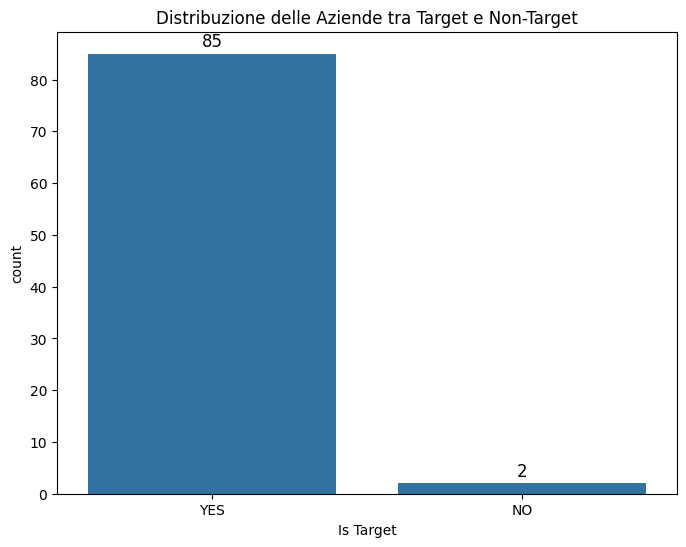

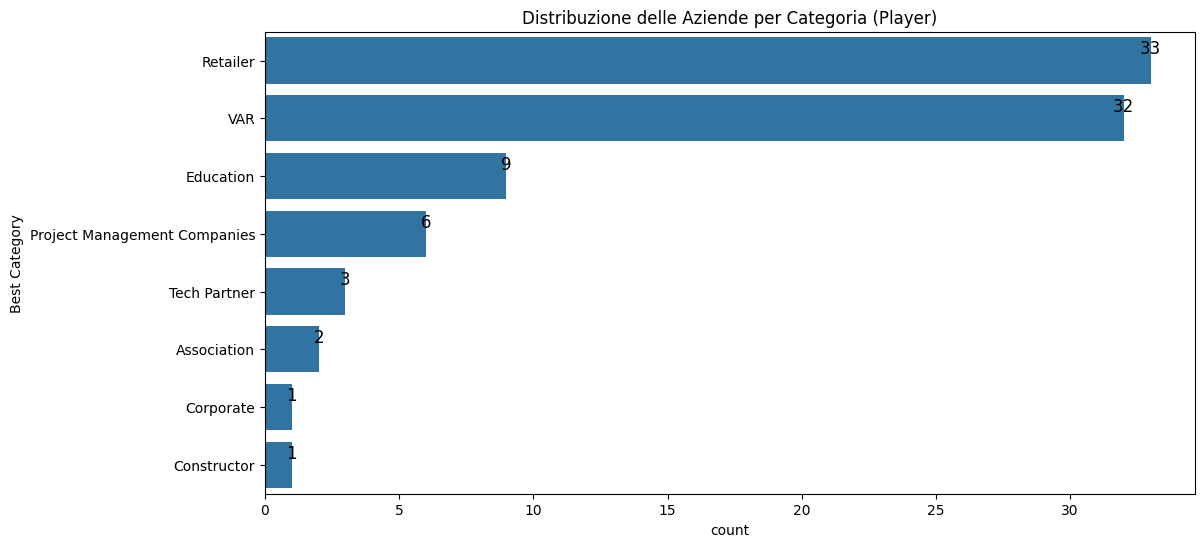

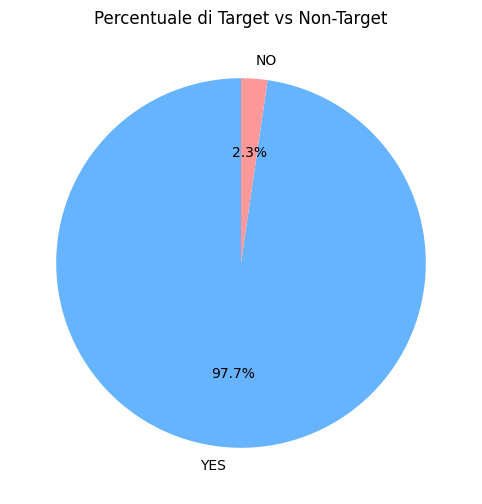

,Contact E-mail,Company / Account,Email Domain,Description,Best Category,Is Target
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...,Education,YES
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...,Retailer,YES
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...,Retailer,YES
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...,Retailer,YES
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...,VAR,YES
9,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es,"Funds for exclusive mobile phones, buy now and...",Retailer,YES
10,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com,Group Lar we are an international company with...,VAR,YES
11,xxxxxxxx@dazia.com,Dazia Capital,dazia.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Project Management Companies,YES
12,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Education,YES
13,xxxxxxxx@monoma.eu,Monoma,monoma.eu,Together we value your empty money We work clo...,Education,YES


In [19]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento

# Inizializzazione del modello Flan-T5 per la classificazione
tokenizer_t5 = T5Tokenizer.from_pretrained("t5-large")  # Usa flan-t5-large
model_t5 = T5ForConditionalGeneration.from_pretrained("t5-large")

# Funzione per classificare la descrizione aziendale utilizzando T5
def classify_with_t5(description, players, notes):
    try:
        scores = []

        for note in notes:
            input_text = f"Classify: {description} as {note}"
            inputs = tokenizer_t5(input_text, return_tensors="pt", truncation=True, max_length=1500)
            outputs = model_t5.generate(**inputs, max_length=20, temperature=0.0)

            # Decodifica il testo generato e calcola un punteggio di somiglianza con la `note`
            generated_text = tokenizer_t5.decode(outputs[0], skip_special_tokens=True).lower()
            score = sum(1 for word in note.lower().split() if word in generated_text) / len(note.split())
            scores.append(score)

        best_score_idx = torch.argmax(torch.tensor(scores)).item()
        return players[best_score_idx] if best_score_idx < len(players) else "Classification failed"
    except Exception as e:
        print(f"Error during classification: {e}")
        return "Classification failed"

# Funzione per aggiungere la colonna "Best Category" e "Is Target" nel DataFrame
def add_classification_and_target_column(df_data, df_context):
    players = df_context['Player'].tolist()
    notes = df_context['Notes'].tolist()
    target_map = df_context.set_index('Player')['Is Target'].to_dict()

    def is_target_category(category):
        return target_map.get(category, "Not found")  # Restituisce "Not found" se la categoria non è trovata

    classifications = []
    is_target_list = []

    for _, row in tqdm(df_data.iterrows(), total=df_data.shape[0], desc="Classificazione Flan-T5", unit="azienda"):
        description = row['Description']
        best_category = classify_with_t5(description, players, notes)
        classifications.append(best_category)
        is_target_list.append(is_target_category(best_category))

    df_data['Best Category'] = classifications
    df_data['Is Target'] = is_target_list
    return df_data

# Funzioni per visualizzare i grafici
def plot_target_distribution(df_data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Is Target', data=df_data)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende tra Target e Non-Target')
    plt.show()

def plot_player_distribution(df_data):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y='Best Category', data=df_data, order=df_data['Best Category'].value_counts().index)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende per Categoria (Player)')
    plt.show()

def plot_target_percentage(df_data):
    target_percentage = df_data['Is Target'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    target_percentage.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
    plt.title('Percentuale di Target vs Non-Target')
    plt.ylabel('')
    plt.show()

# Esegui la classificazione e aggiungi la colonna "Best Category"
df_data_classified_t5large = add_classification_and_target_column(df_data_with_deduction_description, df_context_cleaned)

# Salva il risultato in un file Excel
output_path_t5 = r'C:/Users/Andrea/Downloads/df_data_classified_with_T5Large_categories_and_target.xlsx'
df_data_classified_t5large.to_excel(output_path_t5, index=False)

# Visualizza i grafici
plot_target_distribution(df_data_classified_t5large)
plot_player_distribution(df_data_classified_t5large)
plot_target_percentage(df_data_classified_t5large)

# Mostra il risultato
df_data_classified_t5large


# Classificazione con LLM (da usare bartowski PHI3B in dowload) (ha 512token max)

llama_model_loader: loaded meta data with 39 key-value pairs and 195 tensors from C:\Users\Andrea\Downloads\Phi-3.1-mini-4k-instruct-Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = phi3
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Phi 3 Mini 4k Instruct
llama_model_loader: - kv   3:                           general.finetune str              = 4k-instruct
llama_model_loader: - kv   4:                           general.basename str              = Phi-3
llama_model_loader: - kv   5:                         general.size_label str              = mini
llama_model_loader: - kv   6:                            general.license str              = mit
llama_model_loader: - kv 

Error during classification: Requested tokens (521) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      22.08 ms /   200 runs   (    0.11 ms per token,  9057.56 tokens per second)
llama_print_timings: prompt eval time =    6932.69 ms /   216 tokens (   32.10 ms per token,    31.16 tokens per second)
llama_print_timings:        eval time =   14115.70 ms /   199 runs   (   70.93 ms per token,    14.10 tokens per second)
llama_print_timings:       total time =   21196.19 ms /   415 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.73 ms /    35 runs   (    0.11 ms per token,  9390.93 tokens per second)
llama_print_timings: prompt eval time =   14887.83 ms /   457 tokens (   32.58 ms per token,    30.70 tokens per second)
llama_print_timings:        eval time =    2443.10 ms /    34 runs   (   71.86 ms per token,    13.92 tokens per second)
llama_print_timings:       total time =   17349.44 ms /   491 tokens
Llama.generate: 238 prefix

Error during classification: Requested tokens (549) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.51 ms /   200 runs   (    0.11 ms per token,  9298.43 tokens per second)
llama_print_timings: prompt eval time =    7774.97 ms /   241 tokens (   32.26 ms per token,    31.00 tokens per second)
llama_print_timings:        eval time =   14077.63 ms /   199 runs   (   70.74 ms per token,    14.14 tokens per second)
llama_print_timings:       total time =   21998.89 ms /   440 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.84 ms /    35 runs   (    0.11 ms per token,  9112.21 tokens per second)
llama_print_timings: prompt eval time =   14889.82 ms /   461 tokens (   32.30 ms per token,    30.96 tokens per second)
llama_print_timings:        eval time =    2489.14 ms /    34 runs   (   73.21 ms per token,    13.66 tokens per second)
llama_print_timings:       total time =   17398.13 ms /   495 tokens
Classificazione Llama:  30

Error during classification: Requested tokens (552) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      18.91 ms /   168 runs   (    0.11 ms per token,  8882.78 tokens per second)
llama_print_timings: prompt eval time =   11460.48 ms /   344 tokens (   33.32 ms per token,    30.02 tokens per second)
llama_print_timings:        eval time =   12108.97 ms /   167 runs   (   72.51 ms per token,    13.79 tokens per second)
llama_print_timings:       total time =   23688.44 ms /   511 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.75 ms /    35 runs   (    0.11 ms per token,  9328.36 tokens per second)
llama_print_timings: prompt eval time =   14482.04 ms /   430 tokens (   33.68 ms per token,    29.69 tokens per second)
llama_print_timings:        eval time =    2458.76 ms /    34 runs   (   72.32 ms per token,    13.83 tokens per second)
llama_print_timings:       total time =   16959.14 ms /   464 tokens
Classificazione Llama:  34

Error during classification: Requested tokens (551) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      19.20 ms /   177 runs   (    0.11 ms per token,  9216.83 tokens per second)
llama_print_timings: prompt eval time =   10578.32 ms /   335 tokens (   31.58 ms per token,    31.67 tokens per second)
llama_print_timings:        eval time =   12673.84 ms /   176 runs   (   72.01 ms per token,    13.89 tokens per second)
llama_print_timings:       total time =   23376.05 ms /   511 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.84 ms /    35 runs   (    0.11 ms per token,  9124.09 tokens per second)
llama_print_timings: prompt eval time =   10040.79 ms /   308 tokens (   32.60 ms per token,    30.67 tokens per second)
llama_print_timings:        eval time =    2407.89 ms /    34 runs   (   70.82 ms per token,    14.12 tokens per second)
llama_print_timings:       total time =   12467.57 ms /   342 tokens
Classificazione Llama:  43

Error during classification: Requested tokens (552) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.76 ms /   200 runs   (    0.11 ms per token,  9192.87 tokens per second)
llama_print_timings: prompt eval time =    8939.06 ms /   284 tokens (   31.48 ms per token,    31.77 tokens per second)
llama_print_timings:        eval time =   14212.98 ms /   199 runs   (   71.42 ms per token,    14.00 tokens per second)
llama_print_timings:       total time =   23297.34 ms /   483 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.96 ms /    35 runs   (    0.11 ms per token,  8840.62 tokens per second)
llama_print_timings: prompt eval time =   15355.02 ms /   461 tokens (   33.31 ms per token,    30.02 tokens per second)
llama_print_timings:        eval time =    2460.42 ms /    34 runs   (   72.37 ms per token,    13.82 tokens per second)
llama_print_timings:       total time =   17835.53 ms /   495 tokens
Llama.generate: 242 prefix

Error during classification: Requested tokens (552) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.95 ms /   200 runs   (    0.11 ms per token,  9113.69 tokens per second)
llama_print_timings: prompt eval time =    4969.27 ms /   158 tokens (   31.45 ms per token,    31.80 tokens per second)
llama_print_timings:        eval time =   13971.45 ms /   199 runs   (   70.21 ms per token,    14.24 tokens per second)
llama_print_timings:       total time =   19085.68 ms /   357 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.73 ms /    35 runs   (    0.11 ms per token,  9390.93 tokens per second)
llama_print_timings: prompt eval time =   14897.27 ms /   461 tokens (   32.32 ms per token,    30.95 tokens per second)
llama_print_timings:        eval time =    2449.63 ms /    34 runs   (   72.05 ms per token,    13.88 tokens per second)
llama_print_timings:       total time =   17365.66 ms /   495 tokens
Classificazione Llama:  49

Error during classification: Requested tokens (542) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.72 ms /   200 runs   (    0.11 ms per token,  9208.95 tokens per second)
llama_print_timings: prompt eval time =    5008.60 ms /   159 tokens (   31.50 ms per token,    31.75 tokens per second)
llama_print_timings:        eval time =   13982.79 ms /   199 runs   (   70.27 ms per token,    14.23 tokens per second)
llama_print_timings:       total time =   19127.60 ms /   358 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.78 ms /    35 runs   (    0.11 ms per token,  9259.26 tokens per second)
llama_print_timings: prompt eval time =    8541.07 ms /   263 tokens (   32.48 ms per token,    30.79 tokens per second)
llama_print_timings:        eval time =    2768.31 ms /    34 runs   (   81.42 ms per token,    12.28 tokens per second)
llama_print_timings:       total time =   11328.52 ms /   297 tokens
Classificazione Llama:  55

Error during classification: Requested tokens (553) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      18.57 ms /   170 runs   (    0.11 ms per token,  9154.06 tokens per second)
llama_print_timings: prompt eval time =   11112.65 ms /   342 tokens (   32.49 ms per token,    30.78 tokens per second)
llama_print_timings:        eval time =   12291.83 ms /   169 runs   (   72.73 ms per token,    13.75 tokens per second)
llama_print_timings:       total time =   23524.74 ms /   511 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.78 ms /    35 runs   (    0.11 ms per token,  9261.71 tokens per second)
llama_print_timings: prompt eval time =   14116.24 ms /   429 tokens (   32.90 ms per token,    30.39 tokens per second)
llama_print_timings:        eval time =    2464.53 ms /    34 runs   (   72.49 ms per token,    13.80 tokens per second)
llama_print_timings:       total time =   16599.28 ms /   463 tokens
Classificazione Llama:  67

Error during classification: Requested tokens (553) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.40 ms /   200 runs   (    0.11 ms per token,  9347.54 tokens per second)
llama_print_timings: prompt eval time =    7690.74 ms /   244 tokens (   31.52 ms per token,    31.73 tokens per second)
llama_print_timings:        eval time =   14157.97 ms /   199 runs   (   71.15 ms per token,    14.06 tokens per second)
llama_print_timings:       total time =   21993.93 ms /   443 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.74 ms /    35 runs   (    0.11 ms per token,  9350.79 tokens per second)
llama_print_timings: prompt eval time =   14951.52 ms /   461 tokens (   32.43 ms per token,    30.83 tokens per second)
llama_print_timings:        eval time =    2451.29 ms /    34 runs   (   72.10 ms per token,    13.87 tokens per second)
llama_print_timings:       total time =   17421.17 ms /   495 tokens
Llama.generate: 242 prefix

Error during classification: Requested tokens (552) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      22.04 ms /   200 runs   (    0.11 ms per token,  9074.41 tokens per second)
llama_print_timings: prompt eval time =    5397.27 ms /   168 tokens (   32.13 ms per token,    31.13 tokens per second)
llama_print_timings:        eval time =   13987.68 ms /   199 runs   (   70.29 ms per token,    14.23 tokens per second)
llama_print_timings:       total time =   19531.39 ms /   367 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.80 ms /    35 runs   (    0.11 ms per token,  9215.38 tokens per second)
llama_print_timings: prompt eval time =   14768.56 ms /   461 tokens (   32.04 ms per token,    31.21 tokens per second)
llama_print_timings:        eval time =    2499.38 ms /    34 runs   (   73.51 ms per token,    13.60 tokens per second)
llama_print_timings:       total time =   17287.55 ms /   495 tokens
Llama.generate: 242 prefix

Error during classification: Requested tokens (552) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.90 ms /   200 runs   (    0.11 ms per token,  9133.25 tokens per second)
llama_print_timings: prompt eval time =    6948.49 ms /   212 tokens (   32.78 ms per token,    30.51 tokens per second)
llama_print_timings:        eval time =   14101.50 ms /   199 runs   (   70.86 ms per token,    14.11 tokens per second)
llama_print_timings:       total time =   21193.94 ms /   411 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.71 ms /    35 runs   (    0.11 ms per token,  9433.96 tokens per second)
llama_print_timings: prompt eval time =   14966.96 ms /   461 tokens (   32.47 ms per token,    30.80 tokens per second)
llama_print_timings:        eval time =    2452.94 ms /    34 runs   (   72.15 ms per token,    13.86 tokens per second)
llama_print_timings:       total time =   17438.32 ms /   495 tokens
Llama.generate: 242 prefix

Error during classification: Requested tokens (552) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.44 ms /   200 runs   (    0.11 ms per token,  9326.62 tokens per second)
llama_print_timings: prompt eval time =    6489.46 ms /   201 tokens (   32.29 ms per token,    30.97 tokens per second)
llama_print_timings:        eval time =   14085.60 ms /   199 runs   (   70.78 ms per token,    14.13 tokens per second)
llama_print_timings:       total time =   20710.91 ms /   400 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.77 ms /    35 runs   (    0.11 ms per token,  9291.21 tokens per second)
llama_print_timings: prompt eval time =    8482.16 ms /   263 tokens (   32.25 ms per token,    31.01 tokens per second)
llama_print_timings:        eval time =    2389.78 ms /    34 runs   (   70.29 ms per token,    14.23 tokens per second)
llama_print_timings:       total time =   10890.09 ms /   297 tokens
Classificazione Llama:  75

Error during classification: Requested tokens (552) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      18.22 ms /   169 runs   (    0.11 ms per token,  9273.49 tokens per second)
llama_print_timings: prompt eval time =   10924.24 ms /   343 tokens (   31.85 ms per token,    31.40 tokens per second)
llama_print_timings:        eval time =   12030.57 ms /   168 runs   (   71.61 ms per token,    13.96 tokens per second)
llama_print_timings:       total time =   23069.30 ms /   511 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.75 ms /    35 runs   (    0.11 ms per token,  9340.81 tokens per second)
llama_print_timings: prompt eval time =   13798.85 ms /   430 tokens (   32.09 ms per token,    31.16 tokens per second)
llama_print_timings:        eval time =    2442.86 ms /    34 runs   (   71.85 ms per token,    13.92 tokens per second)
llama_print_timings:       total time =   16259.93 ms /   464 tokens
Classificazione Llama:  91

Error during classification: Requested tokens (551) exceed context window of 512



llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =      21.73 ms /   200 runs   (    0.11 ms per token,  9202.17 tokens per second)
llama_print_timings: prompt eval time =    9671.00 ms /   306 tokens (   31.60 ms per token,    31.64 tokens per second)
llama_print_timings:        eval time =   14189.70 ms /   199 runs   (   71.31 ms per token,    14.02 tokens per second)
llama_print_timings:       total time =   24000.73 ms /   505 tokens

llama_print_timings:        load time =   13603.79 ms
llama_print_timings:      sample time =       3.77 ms /    35 runs   (    0.11 ms per token,  9296.15 tokens per second)
llama_print_timings: prompt eval time =    8283.66 ms /   263 tokens (   31.50 ms per token,    31.75 tokens per second)
llama_print_timings:        eval time =    2375.92 ms /    34 runs   (   69.88 ms per token,    14.31 tokens per second)
llama_print_timings:       total time =   10677.63 ms /   297 tokens
Classificazione Llama:  98

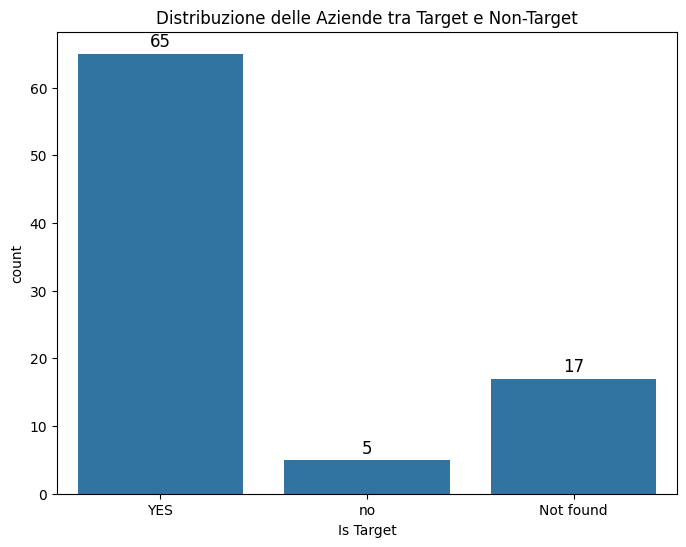

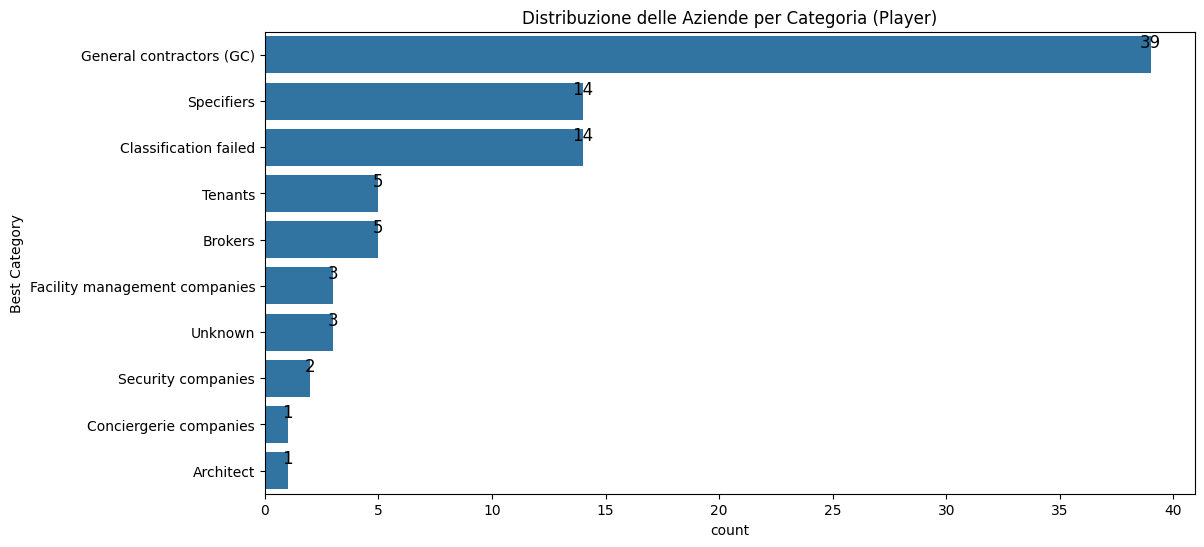

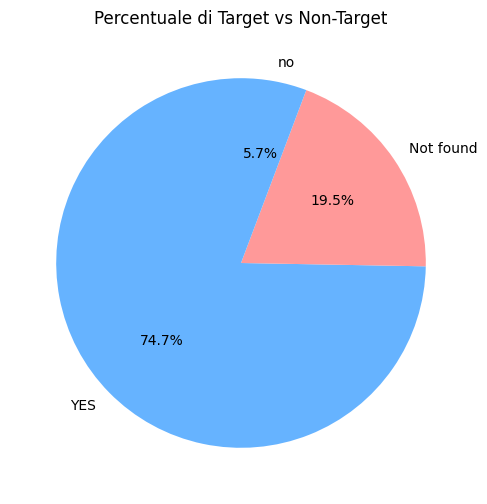

,Contact E-mail,Company / Account,Email Domain,Description,Best Category,Is Target
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...,General contractors (GC),YES
1,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...,Specifiers,YES
2,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We work to lead in sustainable energy and mobi...,Specifiers,YES
3,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...,General contractors (GC),YES
4,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...,General contractors (GC),YES
5,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es,"Funds for exclusive mobile phones, buy now and...",General contractors (GC),YES
6,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com,Group Lar we are an international company with...,General contractors (GC),YES
7,xxxxxxxx@dazia.com,Dazia Capital,dazia.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,General contractors (GC),YES
8,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com,I'm sorry.\n\nAI Deduction: I'm going to analy...,Specifiers,YES
9,xxxxxxxx@monoma.eu,Monoma,monoma.eu,Together we value your empty money We work clo...,Tenants,YES


In [4]:
from llama_cpp import Llama
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Inizializzazione del modello Llama
llm = Llama(model_path=r"C:\Users\Andrea\Downloads\Phi-3.1-mini-4k-instruct-Q4_K_M.gguf")

# Funzione per riassumere la descrizione utilizzando Llama con un limite di 200 token
def summarize_description(description, max_tokens=200):
    try:
        prompt = f"Summarize the following company description in a concise manner, ensuring the summary does not exceed {max_tokens} tokens.\n\nDescription: {description}\n"
        result = llm(prompt, max_tokens=max_tokens, temperature=0, seed=42)
        summary = result['choices'][0]['text'].strip()
        return summary
    except Exception as e:
        print(f"Error during summarization: {e}")
        return description  # In caso di errore, ritorna la descrizione originale

# Funzione per classificare una compagnia basata sulla descrizione e le note delle categorie in batch
def classify_company_llm(description, players, notes, batch_size=3):
    try:
        # Riassume la descrizione se necessario
        summary = summarize_description(description, max_tokens=200)

        best_match = "Unknown"

        # Processa le categorie e le note in batch
        for i in range(0, len(players), batch_size):
            batch_players = players[i:i+batch_size]
            batch_notes = notes[i:i+batch_size]

            # Costruisci il prompt per un batch limitato di categorie
            prompt = f"You are an expert business analyst. Based on the following summary, classify the company into the best category from the options provided.\n\nSummary: {summary}\n\nAvailable Categories and Notes:\n"
            for player, note in zip(batch_players, batch_notes):
                prompt += f"- Category: {player}, Notes: {note}\n"
            prompt += "\nWhich category does the company best fit?"

            # Usa il modello Llama per ottenere la risposta
            result = llm(prompt, max_tokens=35, temperature=0, seed=42)
            response_text = result['choices'][0]['text'].strip()

            # Verifica se la categoria migliore è inclusa nella risposta
            for player in batch_players:
                if player in response_text:
                    return player

        return best_match
    except Exception as e:
        print(f"Error during classification: {e}")
        return "Classification failed"

# Funzione per aggiungere la colonna "Best Category" e "Is Target" nel DataFrame con barra di avanzamento
def add_classification_and_target_column(df_data, df_context):
    players = df_context['Player'].tolist()
    notes = df_context['Notes'].tolist()
    target_map = df_context.set_index('Player')['Is Target'].to_dict()

    def is_target_category(category):
        return target_map.get(category, "Not found")

    tqdm.pandas(desc="Classificazione Llama")
    df_data['Best Category'] = df_data['Description'].progress_apply(lambda description: classify_company_llm(description, players, notes))
    df_data['Is Target'] = df_data['Best Category'].apply(lambda category: is_target_category(category))
    
    return df_data

# Funzioni per visualizzare i grafici
def plot_target_distribution(df_data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Is Target', data=df_data)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende tra Target e Non-Target')
    plt.show()

def plot_player_distribution(df_data):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y='Best Category', data=df_data, order=df_data['Best Category'].value_counts().index)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribuzione delle Aziende per Categoria (Player)')
    plt.show()

def plot_target_percentage(df_data):
    target_percentage = df_data['Is Target'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    target_percentage.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
    plt.title('Percentuale di Target vs Non-Target')
    plt.ylabel('')
    plt.show()

# Applichiamo la classificazione e la verifica del target utilizzando il modello Llama
df_data_classified_PHImini = add_classification_and_target_column(df_data_with_deduction_description_test, df_context_cleaned_test)

# Salviamo il DataFrame aggiornato con le categorie classificate e la colonna Is Target
output_path_llm = r'C:\Users\Andrea\Downloads\df_data_classified_with_PHImini_categories_and_target.xlsx'
df_data_classified_PHImini.to_excel(output_path_llm, index=False)

# Visualizza i grafici
plot_target_distribution(df_data_classified_PHImini)
plot_player_distribution(df_data_classified_PHImini)
plot_target_percentage(df_data_classified_PHImini)

# Mostra il risultato
df_data_classified_PHImini


# **Confronto modelli**

In [2]:
#caricamento modelli
Testdf_data_classified_cosinesimilarity=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\data_classified_cosinesimilarity.xlsx")
Testdf_data_classified_bartlarge=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\df_data_classified_with_bart_categories_and_target.xlsx")
Testdf_data_classified_distilbert=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\df_data_classified_with_distilbert_categories_and_target.xlsx")
Testdf_data_classified_flanT5small=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\df_data_classified_with_flanT5_categories_and_target.xlsx")
Testdf_data_classified_phimini=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\df_data_classified_with_PHImini_categories_and_target.xlsx")
Testdf_data_classified_flanT5large=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\df_data_classified_with_T5Large_categories_and_target.xlsx")

#data validation
df_data_validation_CHAT=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\classified_data_CHAT_Validation.xlsx")
df_data_validation_NotebookLLM=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Progetto\classificazione_domini_notebooklm.xlsx")
df_data_validation_crmtest=pd.read_excel(r"C:\Users\Andrea\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\Desktop\Magistrale\Artificial Intelligence\Potenziale progetto AIA\02 - Dataset\Test set for data validation - Manual Classification.xlsx")

# confronto modelli CHAT

c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Le metriche di precision, recall, F1 score e accuratezza sono state salvate in: C:\Users\Andrea\Downloads\Model_Metrics.xlsx


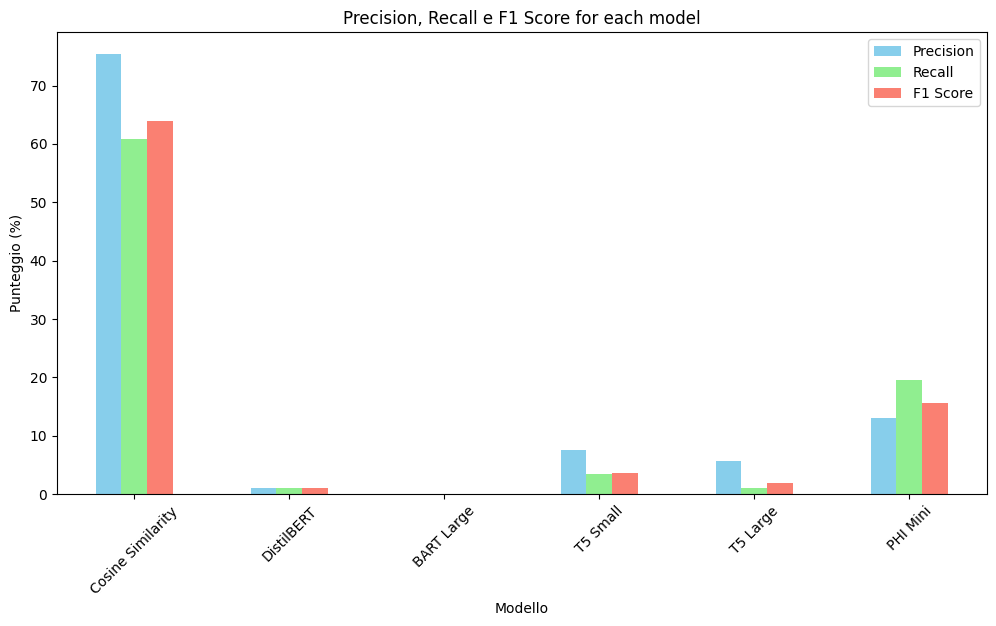

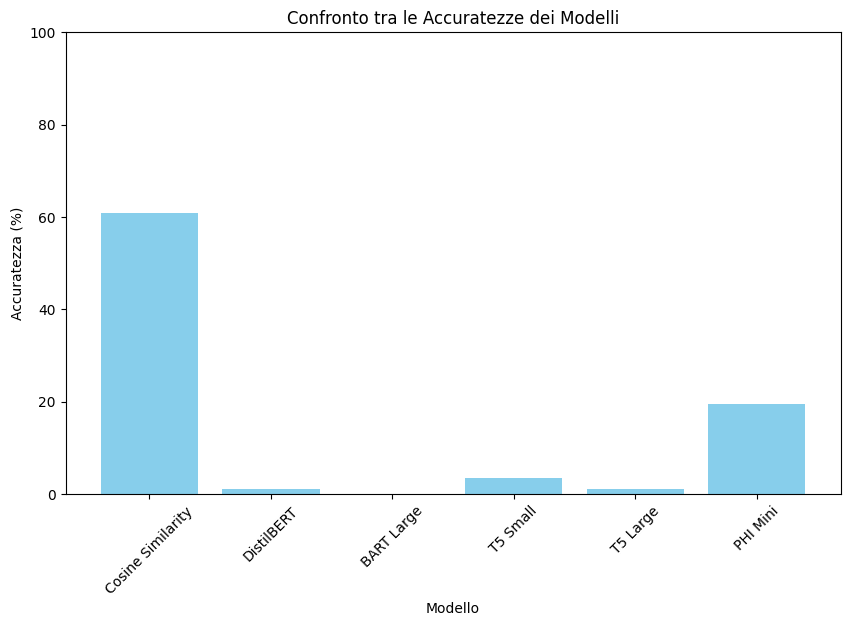

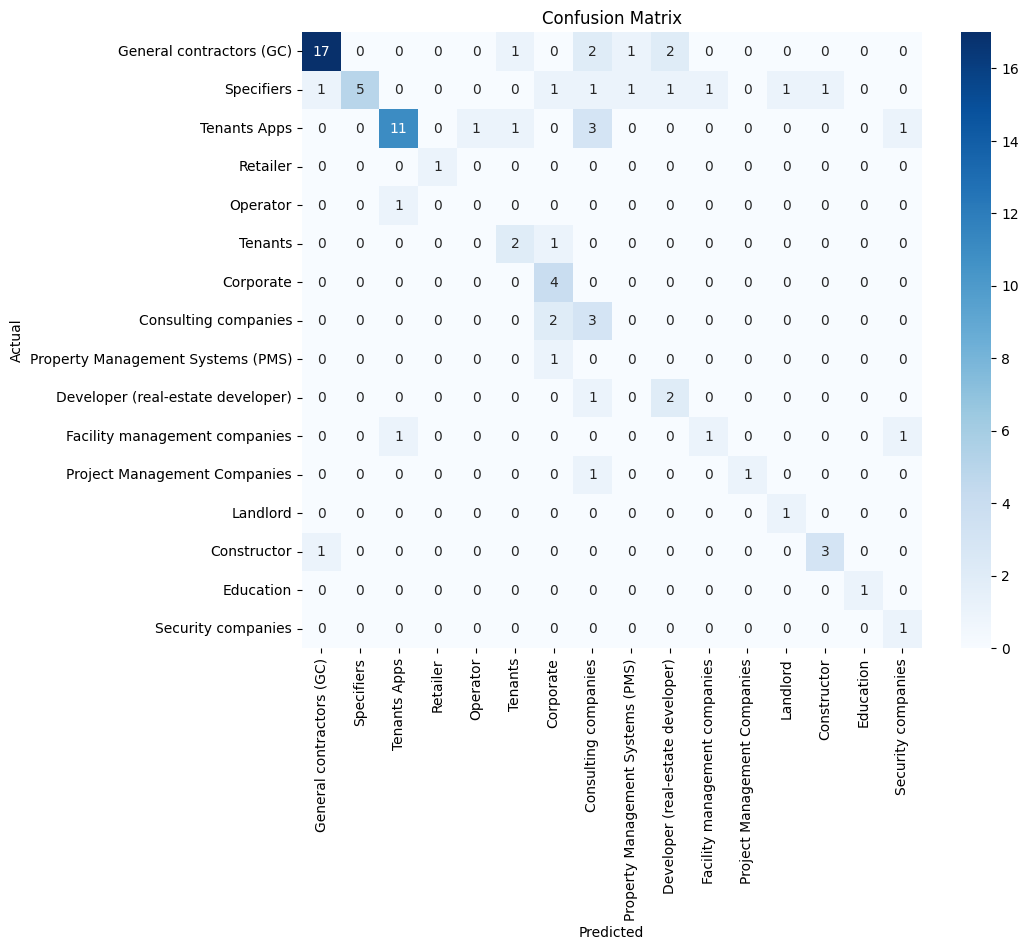

                                   precision    recall  f1-score   support

                        Architect       0.00      0.00      0.00         0
                      Association       0.00      0.00      0.00         0
                      Constructor       0.75      0.60      0.67         5
             Consulting companies       0.27      0.50      0.35         6
                        Corporate       0.44      1.00      0.62         4
Developer (real-estate developer)       0.40      0.67      0.50         3
       Doors manufacturers (OEMs)       0.00      0.00      0.00         0
                        Education       1.00      1.00      1.00         1
    Facility management companies       0.50      0.25      0.33         4
         General contractors (GC)       0.89      0.71      0.79        24
                         Landlord       0.50      1.00      0.67         1
                         Operator       0.00      0.00      0.00         1
     Project Management 

c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Funzione per calcolare l'accuratezza confrontando ogni modello con il DataFrame di riferimento
def calculate_accuracy(df_data_model, df_data_validation_CHAT):
    merged_df = df_data_model.merge(df_data_validation_CHAT[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    correct_matches = merged_df['Best Category_model'] == merged_df['Best Category_validation']
    accuracy = correct_matches.mean() * 100
    return accuracy

# Funzione per calcolare precision, recall e F1 score
def calculate_precision_recall_f1(df_data_model, df_data_validation_CHAT):
    merged_df = df_data_model.merge(df_data_validation_CHAT[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    
    precision = precision_score(y_true, y_pred, average='weighted') * 100
    recall = recall_score(y_true, y_pred, average='weighted') * 100
    f1 = f1_score(y_true, y_pred, average='weighted') * 100
    
    return precision, recall, f1

# Funzione per visualizzare la confusion matrix
def plot_confusion_matrix(df_data_model, df_data_validation_CHAT):
    merged_df = df_data_model.merge(df_data_validation_CHAT[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    
    cm = confusion_matrix(y_true, y_pred, labels=merged_df['Best Category_validation'].unique())
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=merged_df['Best Category_validation'].unique(),
                yticklabels=merged_df['Best Category_validation'].unique())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Funzione per visualizzare il classification report come testo
def display_classification_report(df_data_model, df_data_validation_CHAT):
    merged_df = df_data_model.merge(df_data_validation_CHAT[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    report = classification_report(y_true, y_pred)
    print(report)

# Funzione per il grafico di precision, recall, F1 score per ogni modello
def plot_precision_recall_f1(precision_recall_f1_scores):
    metrics_df = pd.DataFrame(precision_recall_f1_scores, index=["Precision", "Recall", "F1 Score"]).T
    metrics_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen', 'salmon'])
    plt.title("Precision, Recall e F1 Score for each model")
    plt.xlabel("Modello")
    plt.ylabel("Punteggio (%)")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

# Funzione per visualizzare le accuratezze come un grafico a barre
def plot_accuracies(accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
    plt.xlabel('Modello')
    plt.ylabel('Accuratezza (%)')
    plt.title('Confronto tra le Accuratezze dei Modelli')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.show()

# Calcola le accuratezze per ciascun modello
accuracies = {
    "Cosine Similarity": calculate_accuracy(Testdf_data_classified_cosinesimilarity, df_data_validation_CHAT),
    "DistilBERT": calculate_accuracy(Testdf_data_classified_distilbert, df_data_validation_CHAT),
    "BART Large": calculate_accuracy(Testdf_data_classified_bartlarge, df_data_validation_CHAT),
    "T5 Small": calculate_accuracy(Testdf_data_classified_flanT5small, df_data_validation_CHAT),
    "T5 Large": calculate_accuracy(Testdf_data_classified_flanT5large, df_data_validation_CHAT),
    "PHI Mini": calculate_accuracy(Testdf_data_classified_phimini, df_data_validation_CHAT),
}

# Calcola e memorizza precision, recall e F1 per ogni modello
precision_recall_f1_scores = {
    "Cosine Similarity": calculate_precision_recall_f1(Testdf_data_classified_cosinesimilarity, df_data_validation_CHAT),
    "DistilBERT": calculate_precision_recall_f1(Testdf_data_classified_distilbert, df_data_validation_CHAT),
    "BART Large": calculate_precision_recall_f1(Testdf_data_classified_bartlarge, df_data_validation_CHAT),
    "T5 Small": calculate_precision_recall_f1(Testdf_data_classified_flanT5small, df_data_validation_CHAT),
    "T5 Large": calculate_precision_recall_f1(Testdf_data_classified_flanT5large, df_data_validation_CHAT),
    "PHI Mini": calculate_precision_recall_f1(Testdf_data_classified_phimini, df_data_validation_CHAT),
}

# Crea un DataFrame per esportare le metriche
metrics_df = pd.DataFrame(precision_recall_f1_scores, index=["Precision", "Recall", "F1 Score"]).T
metrics_df['Accuracy'] = [accuracies[model] for model in metrics_df.index]

# Salva i dati in un file Excel
output_path = r"C:\Users\Andrea\Downloads\Model_Metrics.xlsx"
metrics_df.to_excel(output_path)

# Informazioni di completamento
print("Le metriche di precision, recall, F1 score e accuratezza sono state salvate in:", output_path)

# Plot di precision, recall e F1 per ogni modello
plot_precision_recall_f1(precision_recall_f1_scores)

# Plot delle accuratezze
plot_accuracies(accuracies)

# Esegui la confusion matrix e il classification report per uno dei modelli (puoi cambiarlo per altri modelli)
plot_confusion_matrix(Testdf_data_classified_cosinesimilarity, df_data_validation_CHAT)
display_classification_report(Testdf_data_classified_cosinesimilarity, df_data_validation_CHAT)


# confronti modelli NotebookLLM

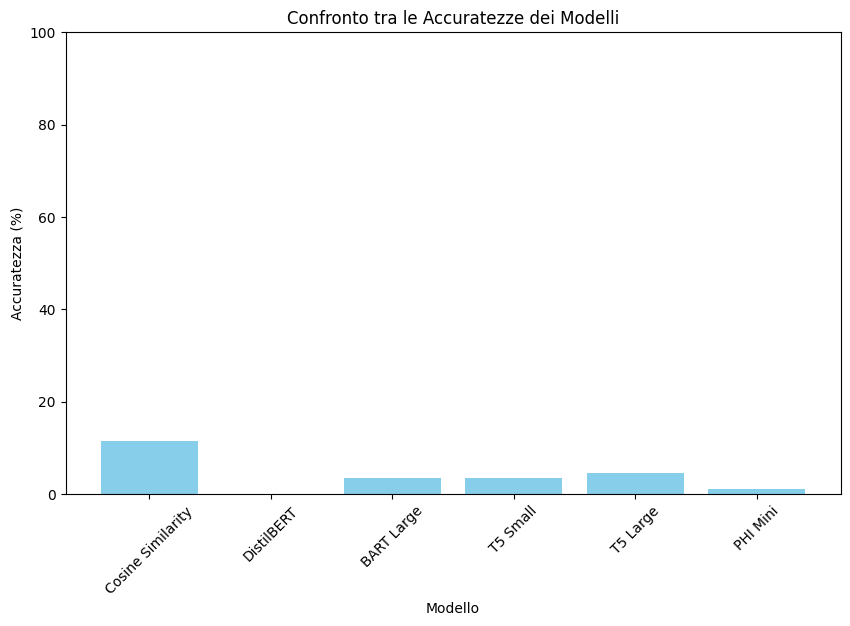

Accuratezze: {'Cosine Similarity': 11.494252873563218, 'DistilBERT': 0.0, 'BART Large': 3.4482758620689653, 'T5 Small': 3.4482758620689653, 'T5 Large': 4.597701149425287, 'PHI Mini': 1.1494252873563218}


c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

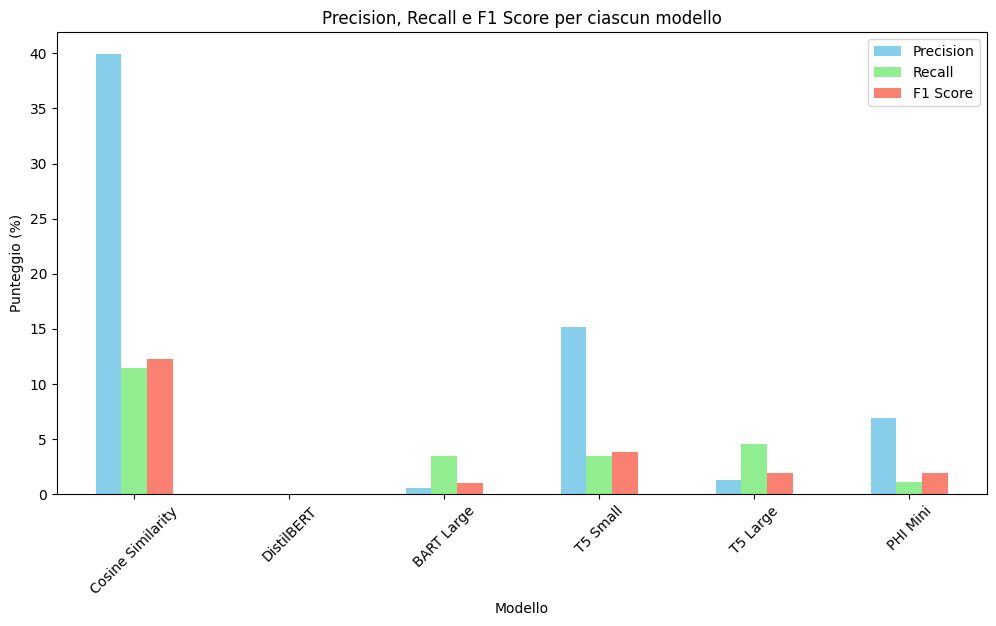

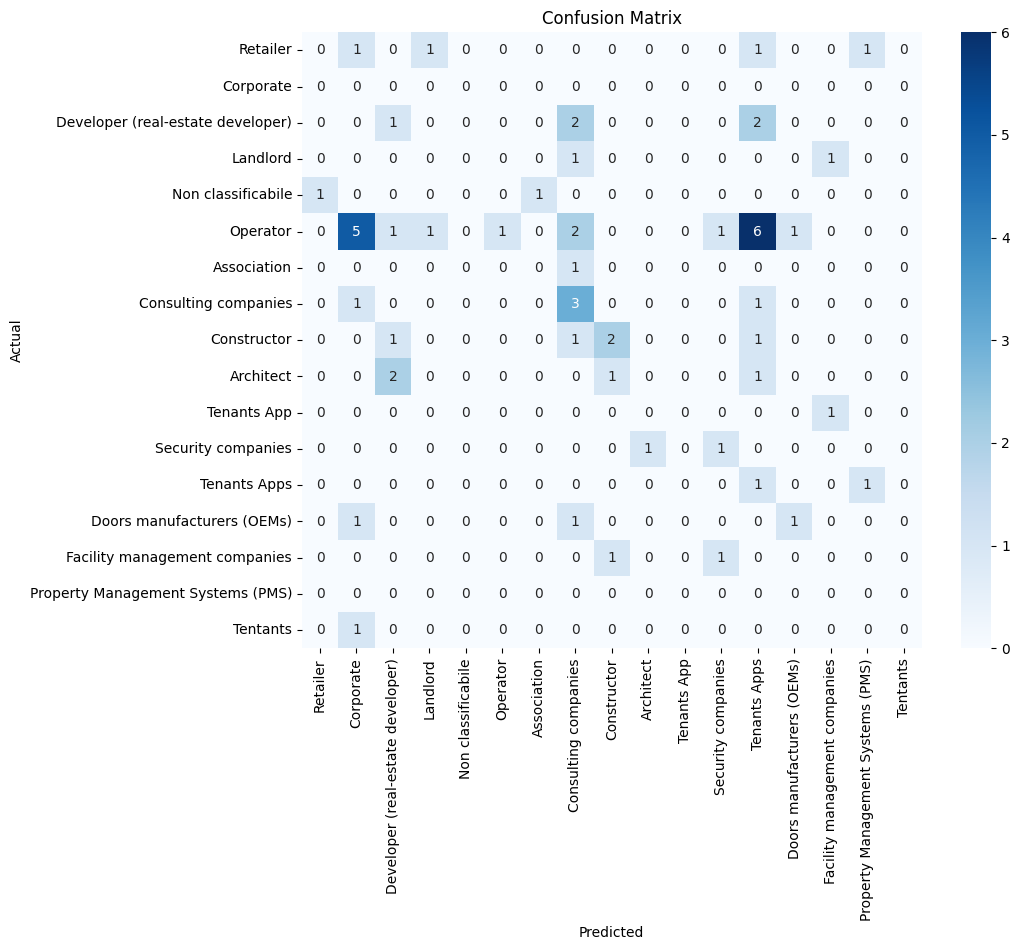

                                   precision    recall  f1-score   support

                        Architect       0.00      0.00      0.00         6
                      Association       0.00      0.00      0.00         1
                      Constructor       0.50      0.25      0.33         8
             Consulting companies       0.27      0.43      0.33         7
                        Corporate       0.00      0.00      0.00         1
Developer (real-estate developer)       0.20      0.10      0.13        10
       Doors manufacturers (OEMs)       0.50      0.25      0.33         4
                        Education       0.00      0.00      0.00         0
    Facility management companies       0.00      0.00      0.00         4
         General contractors (GC)       0.00      0.00      0.00         0
                         Landlord       0.00      0.00      0.00         3
               Non classificabile       0.00      0.00      0.00         3
                        

c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Funzione per calcolare l'accuratezza confrontando ogni modello con il DataFrame di riferimento
def calculate_accuracy(df_data_model, df_data_validation_NotebookLLM):
    merged_df = df_data_model.merge(df_data_validation_NotebookLLM[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    correct_matches = merged_df['Best Category_model'] == merged_df['Best Category_validation']
    accuracy = correct_matches.mean() * 100
    return accuracy

# Funzione per calcolare precision, recall e F1 score
def calculate_precision_recall_f1(df_data_model, df_data_validation_NotebookLLM):
    merged_df = df_data_model.merge(df_data_validation_NotebookLLM[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    
    precision = precision_score(y_true, y_pred, average='weighted') * 100
    recall = recall_score(y_true, y_pred, average='weighted') * 100
    f1 = f1_score(y_true, y_pred, average='weighted') * 100
    
    return precision, recall, f1

# Funzione per visualizzare la confusion matrix
def plot_confusion_matrix(df_data_model, df_data_validation_NotebookLLM):
    merged_df = df_data_model.merge(df_data_validation_NotebookLLM[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    
    cm = confusion_matrix(y_true, y_pred, labels=merged_df['Best Category_validation'].unique())
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=merged_df['Best Category_validation'].unique(),
                yticklabels=merged_df['Best Category_validation'].unique())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Funzione per visualizzare il classification report come testo
def display_classification_report(df_data_model, df_data_validation_NotebookLLM):
    merged_df = df_data_model.merge(df_data_validation_NotebookLLM[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    report = classification_report(y_true, y_pred)
    print(report)

# Funzione per il grafico di precision, recall, F1 score per ogni modello
def plot_precision_recall_f1(precision_recall_f1_scores):
    metrics_df = pd.DataFrame(precision_recall_f1_scores, index=["Precision", "Recall", "F1 Score"]).T
    metrics_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen', 'salmon'])
    plt.title("Precision, Recall e F1 Score per ciascun modello")
    plt.xlabel("Modello")
    plt.ylabel("Punteggio (%)")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

# Calcola le accuratezze per ciascun modello
accuracies = {
    "Cosine Similarity": calculate_accuracy(Testdf_data_classified_cosinesimilarity, df_data_validation_NotebookLLM),
    "DistilBERT": calculate_accuracy(Testdf_data_classified_distilbert, df_data_validation_NotebookLLM),
    "BART Large": calculate_accuracy(Testdf_data_classified_bartlarge, df_data_validation_NotebookLLM),
    "T5 Small": calculate_accuracy(Testdf_data_classified_flanT5small, df_data_validation_NotebookLLM),
    "T5 Large": calculate_accuracy(Testdf_data_classified_flanT5large, df_data_validation_NotebookLLM),
    "PHI Mini": calculate_accuracy(Testdf_data_classified_phimini, df_data_validation_NotebookLLM),
}

# Visualizza le accuratezze come un grafico a barre
def plot_accuracies(accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
    plt.xlabel('Modello')
    plt.ylabel('Accuratezza (%)')
    plt.title('Confronto tra le Accuratezze dei Modelli')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.show()

# Esegui il grafico
plot_accuracies(accuracies)
print("Accuratezze:", accuracies)

# Calcola e memorizza precision, recall e F1 per ogni modello
precision_recall_f1_scores = {
    "Cosine Similarity": calculate_precision_recall_f1(Testdf_data_classified_cosinesimilarity, df_data_validation_NotebookLLM),
    "DistilBERT": calculate_precision_recall_f1(Testdf_data_classified_distilbert, df_data_validation_NotebookLLM),
    "BART Large": calculate_precision_recall_f1(Testdf_data_classified_bartlarge, df_data_validation_NotebookLLM),
    "T5 Small": calculate_precision_recall_f1(Testdf_data_classified_flanT5small, df_data_validation_NotebookLLM),
    "T5 Large": calculate_precision_recall_f1(Testdf_data_classified_flanT5large, df_data_validation_NotebookLLM),
    "PHI Mini": calculate_precision_recall_f1(Testdf_data_classified_phimini, df_data_validation_NotebookLLM),
}

# Plot di precision, recall e F1 per ogni modello
plot_precision_recall_f1(precision_recall_f1_scores)

# Esegui la confusion matrix e il classification report per uno dei modelli (puoi cambiarlo per altri modelli)
plot_confusion_matrix(Testdf_data_classified_cosinesimilarity, df_data_validation_NotebookLLM)
display_classification_report(Testdf_data_classified_cosinesimilarity, df_data_validation_NotebookLLM)
